## Neural Network: Predicting the Occurrence of Heart Disease in Patients

## What is a Neural Network?
A Neural Network is a type of computer program that tries to learn patterns from data, kind of like how our brains learn. It’s made up of layers of “neurons” that pass information to each other. By looking at lots of examples, the network gets better at making predictions or decisions—like telling if someone has heart disease based on their health data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Our Task
We will be predicting the occurrence of heart disease in patients. The use of the Neural Network will be able to capture complex regression tasks that our linear regression couldn't previously do.


##  Load and Preprocess the Hearts Dataset
We will use the `hearts` dataset and classify a patient as either **Has Heart Disease**(label=1) or **Does not have Heart Disease**(label=0)

We'll also drop any rows with missing values.

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [ ]:
# Load and process the heart dataset 
data = pd.read_csv("/Users/kene_2x/Desktop/CMOR 438: DS and Machine Learning/Untitled/Kene_CMOR_438_Spring_25/data/heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

# Features Selection
To better understand why we selected these specific features for classification, read the **Perceptron_hearts** file.

We'll select the "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol", and "FastingBS" for classification.


In [3]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex", "HeartDisease","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df[filtered_df.columns.drop(['HeartDisease'])].values
y = filtered_df['HeartDisease'].values

## Splitting Data into Training and Test Sets

We split our dataset into training and testing sets to evaluate model performance later.

In [27]:
#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import sys
sys.path.append("../")# allows the package to be seen

## Implementation of the Neural Network

Here we will be using the python package I created. That is my_ml.neural_network which can be found in my_ml folder

In [24]:
from my_ml.neural_network import DenseNetwork
import seaborn as sns

sns.set_theme()
input_size = X_train.shape[1] 
net = DenseNetwork(architecture=[input_size, 12, 1])
net.train(X_train, y_train, lr=0.01, n_epochs=100)

Initial Loss = 0.17638569898979378
Epoch 1 Loss = 0.11186347300777824
Epoch 2 Loss = 0.09972102705857705
Epoch 3 Loss = 0.0942381195657953
Epoch 4 Loss = 0.08945145109063259
Epoch 5 Loss = 0.08535762933914295
Epoch 6 Loss = 0.08187473552381949
Epoch 7 Loss = 0.07891174751040739
Epoch 8 Loss = 0.07638476583410593
Epoch 9 Loss = 0.07421989550946306
Epoch 10 Loss = 0.07235404190791667
Epoch 11 Loss = 0.07073461527434029
Epoch 12 Loss = 0.06931853447295246
Epoch 13 Loss = 0.06807090418532176
Epoch 14 Loss = 0.06696363895303349
Epoch 15 Loss = 0.06597419026511968
Epoch 16 Loss = 0.06508444501444081
Epoch 17 Loss = 0.06427981042266163
Epoch 18 Loss = 0.06354847325156335
Epoch 19 Loss = 0.06288080989851724
Epoch 20 Loss = 0.062268921502727496
Epoch 21 Loss = 0.061706269902253315
Epoch 22 Loss = 0.061187393619488106
Epoch 23 Loss = 0.06070768670663303
Epoch 24 Loss = 0.06026322665874178
Epoch 25 Loss = 0.059850640484274825
Epoch 26 Loss = 0.05946700038071234
Epoch 27 Loss = 0.05910974234467089

## Plot Training Loss Over Time

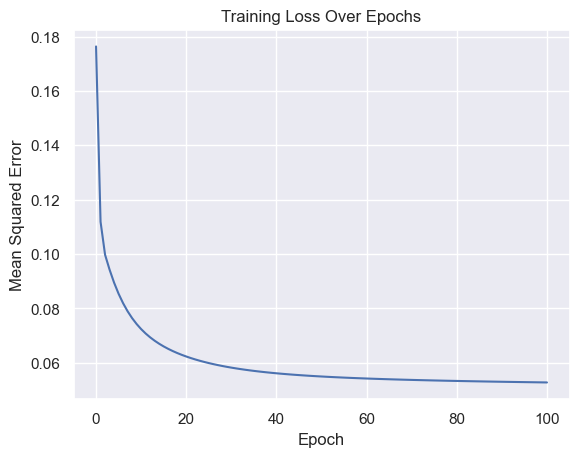

[0.17638569898979378, 0.11186347300777824, 0.09972102705857705, 0.0942381195657953, 0.08945145109063259, 0.08535762933914295, 0.08187473552381949, 0.07891174751040739, 0.07638476583410593, 0.07421989550946306, 0.07235404190791667, 0.07073461527434029, 0.06931853447295246, 0.06807090418532176, 0.06696363895303349, 0.06597419026511968, 0.06508444501444081, 0.06427981042266163, 0.06354847325156335, 0.06288080989851724, 0.062268921502727496, 0.061706269902253315, 0.061187393619488106, 0.06070768670663303, 0.06026322665874178, 0.059850640484274825, 0.05946700038071234, 0.05910974234467089, 0.05877660252770113, 0.05846556730748508, 0.05817483394737945, 0.05790277942108559, 0.057647935527952415, 0.057408968852411875, 0.057184664454802164, 0.05697391244072178, 0.05677569675788426, 0.05658908572552177, 0.05641322392147221, 0.056247325143884176, 0.056090666234174844, 0.05594258160040841, 0.05580245831956968, 0.05566973172640153, 0.05554388141803878, 0.05542442761949603, 0.05531092786666493, 0.05

In [25]:
errors = np.array(net.loss_history).flatten().tolist()
plt.plot(errors)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print(np.array(net.loss_history).flatten().tolist())

## Evaluate Model Performance

We can calculate the MSE. From the value below, we can see that our mse is relatively small. This means our Neural Network predicts almost accurately the occurrence of heart disease in patients.

In [26]:
from sklearn.metrics import mean_squared_error
# Compute MSE
y_pred = np.array([net.predict(xi) for xi in X_test])
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1146


## Conclusion
As we can see, the neural network is better than the logistic regression at predicting the occurrence of heart disease in these patients. 